In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\erik_\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path, 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset

## Read data from Am

In [42]:
am_left = read("Am_2_2.TKA")
am_right = read("Am_1.TKA")
#plt.figure(figsize=(11.7, 8.3), dpi=300)


## Fit 59.5 keV peak

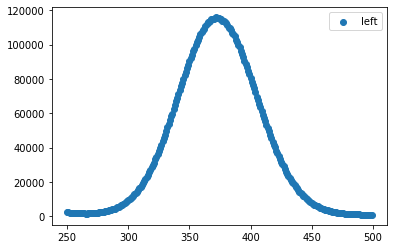

In [136]:
start,end = 250,500
plt.scatter(am_left[0][start:end], am_left[1][start:end], label="left")
#plt.scatter(am_right[0],am_right[1], label="right")
plt.legend()
plt.show()

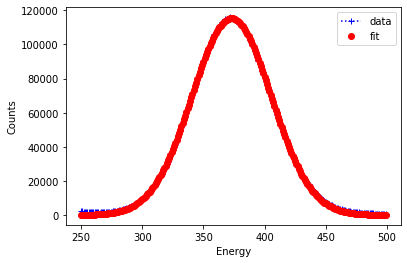

In [137]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_left[0][start:end]
y = am_left[1][start:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),x[y.argmax(axis=0)],(end-start)])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

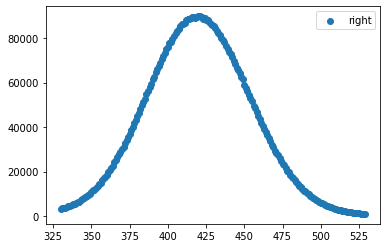

In [138]:
start,end = 330,530
#plt.scatter(am_left[0][start:end], am_left[1][start:end], label="left")
plt.scatter(am_right[0][start:end],am_right[1][start:end], label="right")
plt.legend()
plt.show()

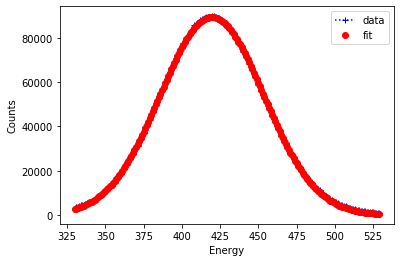

In [139]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),x[y.argmax(axis=0)],(end-start)])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

## 26.3 keV and 33.2 keV fits

In [131]:
def double_gaus(x,a_1,x0_1,sigma_1,a_2, x0_2, sigma_2):
    return gaus(x,a_1,x0_1,sigma_1)+ gaus(x,a_2, x0_2, sigma_2)

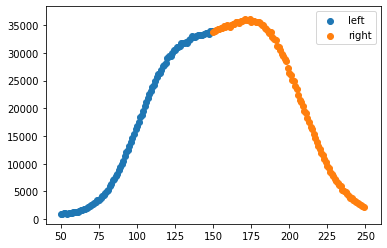

In [141]:
start,middle,end = 50,150,250
plt.scatter(am_left[0][start:middle], am_left[1][start:middle], label="left")
plt.scatter(am_left[0][middle:end],am_left[1][middle:end], label="right")
plt.legend()
plt.show()

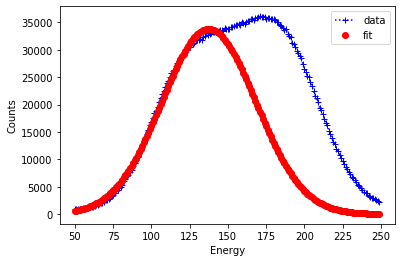

In [170]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_left[0][start:end]
y = am_left[1][start:end]

x_left=am_left[0][start:middle]
y_left=am_left[1][start:middle]

x_right=am_left[0][middle:end]
y_right=am_left[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      35000,120,30]

popt,pcov = curve_fit(gaus,x_left,y_left,p0=guess[:3])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

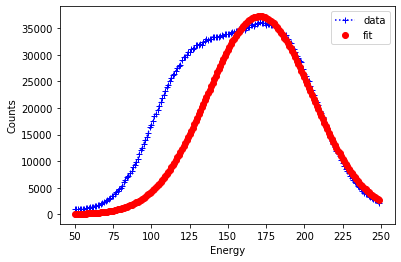

In [171]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_left[0][start:end]
y = am_left[1][start:end]

x_left=am_left[0][start:middle]
y_left=am_left[1][start:middle]

x_right=am_left[0][middle:end]
y_right=am_left[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      35000,120,30]

popt,pcov = curve_fit(gaus,x_right,y_right,p0=guess[3:])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

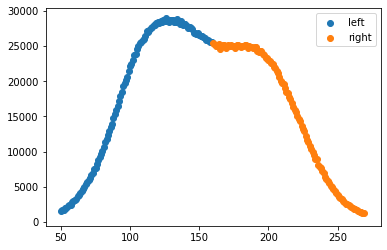

In [175]:
start,middle,end = 50,160,270
plt.scatter(am_right[0][start:middle],am_right[1][start:middle], label="left")
plt.scatter(am_right[0][middle:end],  am_right[1][middle:end], label="right")
plt.legend()
plt.show()

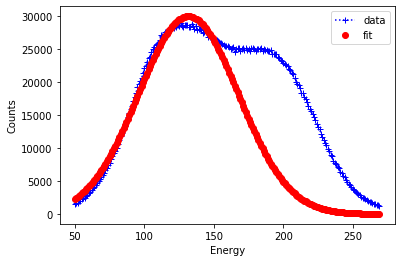

In [177]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

x_left=am_right[0][start:middle]
y_left=am_right[1][start:middle]

x_right=am_right[0][middle:end]
y_right=am_right[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      25000,150,30]

popt,pcov = curve_fit(gaus,x_left,y_left,p0=guess[:3])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

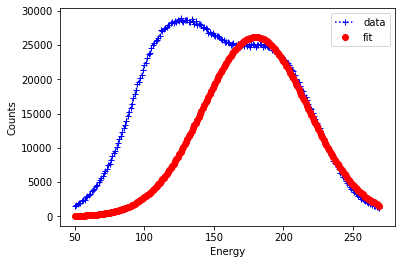

In [178]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

x_left=am_right[0][start:middle]
y_left=am_right[1][start:middle]

x_right=am_right[0][middle:end]
y_right=am_right[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      35000,120,30]

popt,pcov = curve_fit(gaus,x_right,y_right,p0=guess[3:])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()